# Trabalho de conclusão de curso  
## Modelo para alocação de ativos baseado na perda máxima tolerada


### Tema: Como a métrica de risco Value at Risk pode auxiliar o investidor pessoa física na construção de carteiras de investimentos? 

A teoria moderna de carteiras, inicialmente foi concebida por Harry Markowitz, em seu estudo chamado Portfolio Selection publicado no Journal of finance em 1952. Tal estudo era baseado no desvio-padrão e média dos retornos de ativos. Esse estudo viabilizou uma metodologia capaz de descobrir o menor risco de uma carteira dado um retorno desejado pelo investidor. Porém, a métrica de risco usada, não deixa claro para os investidores, os valores em absoluto que poderiam ser perdidos ao investir em tais carteiras de ativos. 

A proposta da pesquisa é conscientizar o investidor sobre as possíveis perdas na escolha de carteiras de investimentos e propor carteiras baseadas somente na disposição de perda de patrimônio investido. Ou seja, descobrir o maior retorno possível dada uma porcentagem de perda do valor investido permitida pelo investidor. 

Os ativos usados nessa pesquisa para a elaboração das carteiras buscam abranger todas as classes de ativos de renda fixa e variável mais presentes no cotidiano do mercado financeiro. Os ativos usados foram o Dólar, Ibovespa e Certificado de Depósito Interbancário(CDI).

Os passos para a conclusão da aplicação estão descritos abaixo.

1. Coleta de dados

Os dados utilizados são disponibilizados no site do Banco Central do Brasil, e foi usada uma Application Programming Interface (API) do site Quandl, plataforma para coleta de dados econômicos, para extrair as informações necessárias para a aplicação. A seguir, pode-se conferir os passos necessários para a conclusão da aplicação.

2. Cálculo dos retornos mensais das carteiras de investimento

Após reunir os dados necessários, foi preciso converter os preços e números de índice em retorno mensal. Feito isso, foi necessário gerar uma combinação finita de carteiras, onde seriam combinados os três ativos em diferentes níveis comparados ao patrimônio total. Após decidir a combinação de ativos, calcula-se o retorno mensal de cada carteira de investimentos. 

3. Identificação das carteiras eficientes

A aplicação do modelo de Markowitz tem por suposições as hipóteses de que o investidor é avesso ao risco e deseja o maior retorno, assim se torna necessário o cálculo do retorno médio da carteira e sua volatilidade. Deste modo, pode-se concluir que as carteiras com maior nível de retorno para cada nível de risco, seriam as carteiras de preferências para os investidores. Tais carteiras denominadas como eficientes seriam as melhores carteiras de investimento para se investir. Porém, a interpretação do risco desejado não é clara para todo tipo de investidor, nem todos os investidores têm conhecimentos de estatística e, por isso, não estão cientes da volatilidade que toleram.

4. Cálculo do VaR de cada Carteira de Investimento

Na intenção de deixar claro o nível de risco em que o investidor está correndo, essa medida foi transformada em uma medida VaR onde é possível traçar um paralelo entre a volatilidade e o valor que pode ser perdido de forma absoluta.

5. Identificar carteiras ideais dado o nível de aversão a perdas

Obtidas as carteiras e o seu potencial de perda absoluta dado pela medida VaR, é possível fazer ao investidor a seguinte pergunta. “O quanto você se permite em perder desse montante em situações onde o Mercado não está sofrendo uma crise em busca de um retorno maior que a média?”, uma pergunta mais razoável de se entender e responder. Com essa pergunta é possível definir uma medida de VaR e por conseguinte calcular indiretamente o nível de volatilidade que o investidor está disposto a perder. Ao identificar o nível de volatilidade, é factível identificar a carteira eficiente e a composição adequada às preferências do investidor.


In [3]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
from datetime import datetime
from scipy import stats

In [4]:
import tcc as tcc
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Calculos dos retornos lineares
O retorno no tempo $t$ para o tempo ${t+1}$ é dado por:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

ou

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$




# $$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$




## Calculos dos log retornos
Usaremos o conceito de log retorno somente por uma questão prática do calculo dos retornos acumulados mês a mê e ano a ano
- O log retorno no tempo $t$ para o tempo ${t+1}$ é dado por:

$$ \textrm Log \ retorno  = ln(1 + \textrm Retorno \ Linear) $$

e usaremos a seguinte relação

$$ \textrm Retorno \ Linear = e^{log \ retorno} -1 $$




Agora é necessário baixar dados do CDI diário, preços do dólar, a variação dos índices S&P 500 e Ibovespa e transformá-los em retornos diários

Agora vamos gerar gráficos dos retornos acumulados de cada ativo desde o primeiro dia útil de 2016

In [5]:
ativos = tcc.retornos('2016-01-01')
ativos.tail()

,retorno_dolar_m,retorno_cdi_m,retorno_ibovespa_m
Date,,,
2019-05-31,-0.001166,0.005430,0.007026
2019-06-30,-0.027537,0.004688,0.040575
2019-07-31,-0.012035,0.005430,0.008369
2019-08-31,0.099248,0.005017,-0.006659
2019-09-30,0.006259,0.004638,0.035705


In [6]:
import ffn as ffn

<module 'matplotlib.pyplot' from '/home/raphael/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

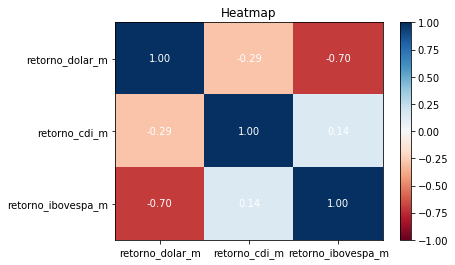

In [7]:
ffn.plot_corr_heatmap(ativos)

In [8]:
tcc.retorno_acumulado(ativos).tail()

,retorno_dolar_m,retorno_cdi_m,retorno_ibovespa_m
Date,,,
2019-05-31,4.893310,36.050405,135.407379
2019-06-30,2.004824,36.688233,144.959052
2019-07-31,0.777171,37.430509,147.009132
2019-08-31,10.779124,38.120024,145.364216
2019-09-30,11.472514,38.760570,154.124970


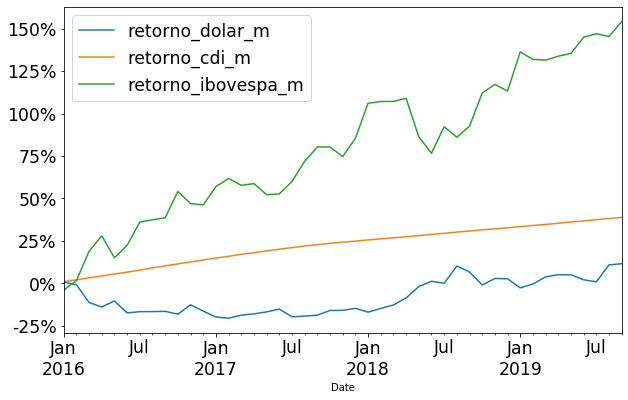

In [9]:
tcc.grafico_retorno_acumulado(ativos).legend(fontsize='xx-large')

Obter historgrama dos retornos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f197f68a910>,
      dtype=object)

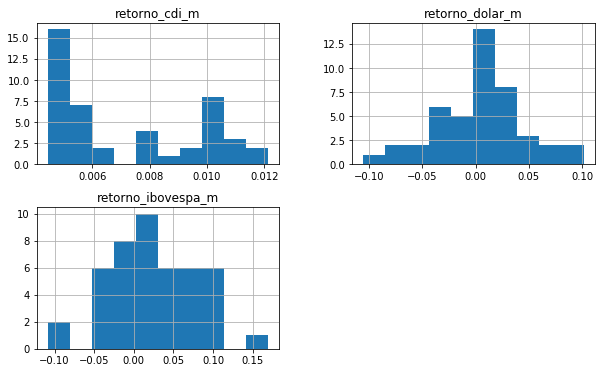

In [10]:
ativos.hist(figsize=(10,6))

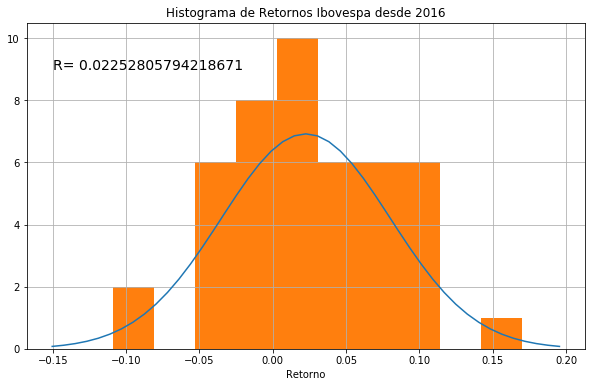

In [11]:
mu = ativos['retorno_ibovespa_m'].mean()
sigma = ativos['retorno_ibovespa_m'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, ativos['retorno_ibovespa_m'].shape[0])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ativos['retorno_ibovespa_m'].hist(figsize=(10,6))
plt.title("Histograma de Retornos Ibovespa desde 2016")
plt.xlabel('Retorno')
plt.text(x=-0.15,y=9,s = ('R= '+ str(ativos['retorno_ibovespa_m'].mean())),fontsize=14)
plt.show()

## Verificar a normalidade dos ativos
Calcular:
- Assimetria
- Curtose
- Teste de normalidade Jarque-Bera
    



### Assimetria

Uma valor negativo significa que a maioria das medidas são negativas e com a média abaixo de 0



$$ A(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


### Curtose

Intuitivamente, a curtose mede o quanto as caudas são achatadas. A distribuição normal tem uma curtose de 3 e, portanto, se a curtose dos seus retornos for menor que 3, ela tenderá a ter caudas mais finas e, se a curtose for maior que 3, a distribuição terá uma calda mais 'gorda'

$$ C(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$




### teste de Jarque-Bera

O teste Jarque-Bera usa a curtose e assimetria da distribuição para saber se a distribuição é aproximadamente normal.Na distribuição normal temos assimetria nula e curtose igual a 3.Com esse teste podemos concluir se a distribuição dos ativos se aprxima de uma distribuição normal.

$$ JB = N(\frac{A(R)}{6} + \frac{(C(R)-3)^2}{24}) $$

pesquisar sobre esse texto, os fundamentos


Faremos uma demonstração com dados desde o inicio de 2016

In [12]:
tcc.sumario_estatistico(ativos)

,media,mediana,media>mediana?,máxima,mínima,desvio padrao,assimetria,curtose,teste de jarque_bera
retorno_dolar_m,0.003293,0.006259,False,0.101324,-0.105730,0.042318,-0.059886,3.501992,True
retorno_cdi_m,0.007309,0.005669,True,0.012136,0.004441,0.002569,0.450209,1.545527,True
retorno_ibovespa_m,0.022528,0.008786,True,0.169701,-0.108715,0.057653,0.159337,3.052216,True


# Valor em risco (VaR)  e Valor em risco condicionado (CVar)

Veremos 3 formas de calcular o Valor em Risco

1. Valor em risco histórico
2. Valor em Risco Paramétrico
3. Valor em risco modificado (Cornish-Fisher)

Para calcular o VaR histórico no nível de 1% é necessário ordenar os retornos por ordem crescente e escolher os aquele que corresponde ao menor percentil

# Cornish-Fisher Modification

## Cópia do curso
A modificação Cornish-Fisher é um ajuste simples e deixa nossa distribuição de retornos mais realista. O escore z indica quantos desvios padrão estão longe da média que precisamos encontrar para encontrar o VaR. Se os retornos não forem normais, sabemos que o z-score nos fornecerá um número que não é verdade. A idéia básica é que, como podemos observar a assimetria e curtose dos dados, podemos ajustar o escore z para cima ou para baixo para obter um escore z modificado. por exemplo. intuitivamente, todas as outras coisas são iguais; se a assimetria for negativa, diminuiremos o escore z mais para baixo; se a assimetria for positiva, aumentaremos. O escore z ajustado que chamaremos de $ z_ {cornishfisher} $ fornecido por:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$

In [21]:
def sumario_var_tabela(ativos):
    tabela_var = [tcc.var_historico(ativos), 
                  tcc.var_gaussiano(ativos), 
                  tcc.var_cornish_fisher(ativos),
                  tcc.cvar_historico(ativos)]
    comparacao = pd.concat(tabela_var,
                           axis=1)
    comparacao.columns=['Histórico',
                        'Gaussiano',
                        'Cornish-Fisher',
                        'CVaR']
    
    return comparacao.plot.bar(title="Valor em Risco: Dólar, CDI, e Ibovespa, nível de confiança de 1%",
                        figsize=(10,6))

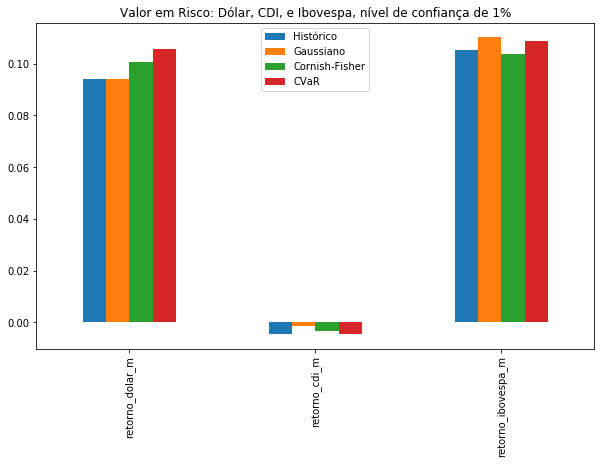

In [22]:
sumario_var_tabela(ativos)

Obter os tipos de VaR para cada ativo

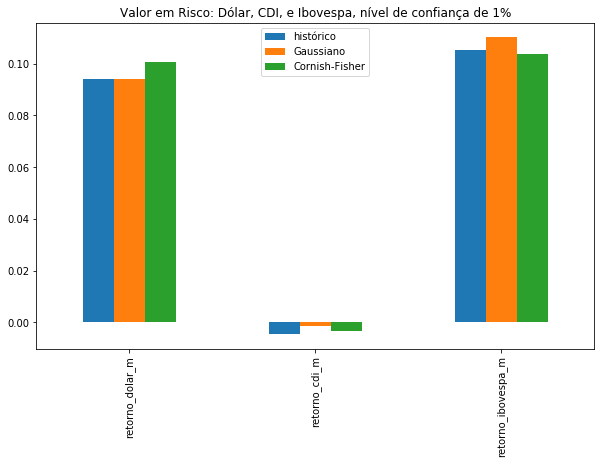

In [18]:
tcc.sumario_var(ativos)

# Fronteira Eficiente
Calcular as carteiras eficientes combinando os 3 ativos.Será necessário a media e variância dos retornos de cada ativo. As carteiras são feitas de combinações de pesos dos ativos(colocar equação abaixo). Os pesos terão um andamento a cada incremento de 0,5% e a soma dos pesos de cada ativo é igual a 1, ou seja não podemos ter alavancagem e todo o dinheiro disponível será investido 

In [15]:
covariancia = pd.DataFrame(ativos.cov())
retorno_medio_ativos = pd.DataFrame(ativos.mean(),
                             columns=['retorno_medio_mensal'])
desvio_padrao = ativos.std(ddof=1)

Obter carteiras e enumerar de acordo com o risco(desvio-padrão), do menor para o maior. Com o método de somente obter pesos múltiplos de 0,5%, foram obtidas 19483 carteiras de investimentos onde somente algumas são eficientes

In [16]:
tabela = tcc.carteiras_peso_retorno_volatilidade(retorno_medio_ativos
                                                 , covariancia)
tabela.head()

,peso_dolar,peso_cdi,peso_ibovespa,vol_carteira,ret_carteira
0,0.030,0.960,0.010,0.008196,0.091737
1,0.035,0.950,0.015,0.008209,0.092466
2,0.025,0.965,0.010,0.008223,0.091999
3,0.030,0.955,0.015,0.008230,0.092727
4,0.035,0.955,0.010,0.008236,0.091476


In [17]:
tabela.shape

(19483, 5)

Obter volatilidade e retorno das carteiras eficientes em duas casa decimais

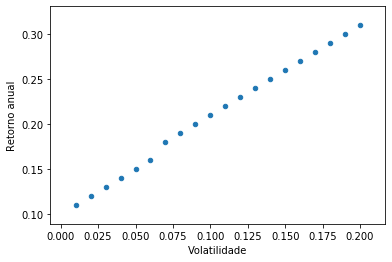

In [18]:
fronteira_eficiente = tcc.fronteira_eficiente(tabela)
fronteira_eficiente.plot.scatter(x= 'Volatilidade',
                                 y='Retorno anual')

In [19]:
carteiras_eficientes = tcc.carteiras_eficientes(tabela)
carteiras_eficientes.head()

,peso_dolar,peso_cdi,peso_ibovespa,vol_carteira,ret_carteira
411,0.060,0.855,0.085,0.014576,0.105089
1058,0.100,0.755,0.145,0.022433,0.115025
2068,0.140,0.655,0.205,0.030906,0.125044
3309,0.180,0.555,0.265,0.039601,0.135144
4960,0.225,0.450,0.325,0.048184,0.145055


In [20]:
carteiras_eficientes.to_excel('composicao_carteiras_eficientes.xlsx')

Obter o peso de cada ativo das carteiras eficientes

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe951f5ff10>,
 Text(0.5, 0, 'Risco (desvio-padrão)'),
 Text(0, 0.5, 'Retorno anual'),
 <matplotlib.legend.Legend at 0x7fe951c7cc90>)

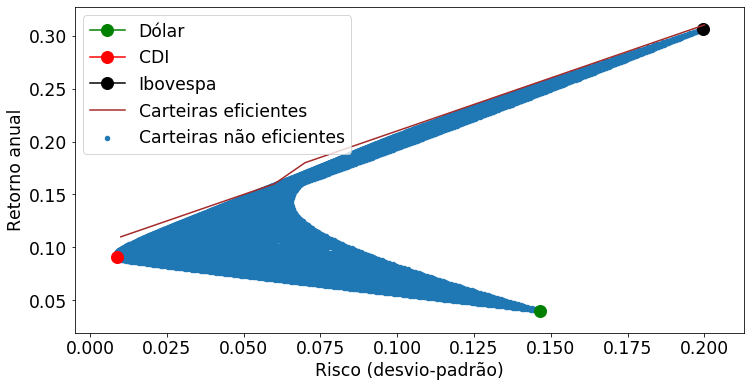

In [21]:
tcc.grafico_carteiras(retorno_medio_ativos, covariancia)

Explicar o que é a fronteria eficiente de markowitz e a lógica de escolha de portfólios.

# Comparar carteiras eficientes com o CDI

In [22]:
def retorno_carteiras_eficientes(ativos,carteiras_eficientes):
    carteiras = ativos
    for i in range(0,carteiras_eficientes.shape[0]):
        carteira_i_eficiente=pd.DataFrame(np.matmul(ativos.values,carteiras_eficientes.iloc[i,0:3].values),
                                          index=ativos.index,
                                          columns=['carteira %i' %(i+1)])
        carteiras=carteiras.join(carteira_i_eficiente)
    return carteiras

In [23]:
retorno_carteiras_eficientes = retorno_carteiras_eficientes(ativos,carteiras_eficientes) 
retorno_carteiras_eficientes.head()

,retorno_dolar_m,retorno_cdi_m,retorno_ibovespa_m,carteira 1,carteira 2,carteira 3,carteira 4,carteira 5,carteira 6,carteira 7,...,carteira 11,carteira 12,carteira 13,carteira 14,carteira 15,carteira 16,carteira 17,carteira 18,carteira 19,carteira 20
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.006779,0.009489,-0.041195,0.005019,0.001869,-0.001280,-0.004430,-0.007593,-0.010448,-0.016480,...,-0.025843,-0.027509,-0.029174,-0.030854,-0.032519,-0.034198,-0.035891,-0.037570,-0.039263,-0.040955
2016-02-29,-0.015635,0.010015,0.059102,0.012648,0.014567,0.016487,0.018406,0.020197,0.022255,0.025977,...,0.035186,0.037930,0.040674,0.043290,0.046034,0.048650,0.051137,0.053753,0.056240,0.058728
2016-03-31,-0.105730,0.011605,0.169701,0.018003,0.022796,0.027588,0.032380,0.036586,0.042348,0.051728,...,0.081563,0.091790,0.102016,0.111656,0.121883,0.131523,0.140577,0.150217,0.159270,0.168323
2016-04-30,-0.030380,0.010545,0.077015,0.013739,0.016090,0.018442,0.020793,0.022940,0.025572,0.030147,...,0.042649,0.046612,0.050576,0.054335,0.058298,0.062057,0.065611,0.069370,0.072924,0.076478
2016-05-31,0.041824,0.011075,-0.100890,0.003403,-0.002085,-0.007573,-0.013061,-0.018395,-0.023785,-0.034355,...,-0.055222,-0.060371,-0.065519,-0.070514,-0.075663,-0.080658,-0.085499,-0.090494,-0.095336,-0.100177


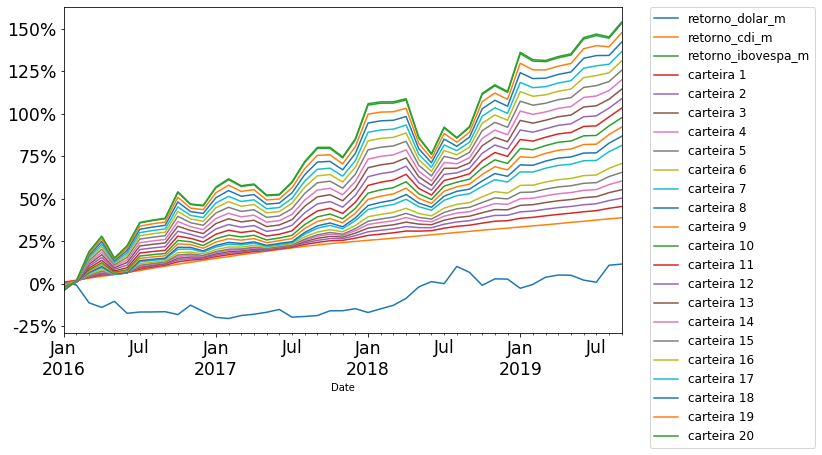

In [24]:
grafico_carteiras = tcc.grafico_retorno_acumulado(retorno_carteiras_eficientes)

# Misturar VaR com as carteiras eficientes

In [25]:
sumario_carteiras_eficientes = carteiras_eficientes
sumario_carteiras_eficientes.index = retorno_carteiras_eficientes.columns[3:].tolist()
sumario_carteiras_eficientes.head()

,peso_dolar,peso_cdi,peso_ibovespa,vol_carteira,ret_carteira
carteira 1,0.060,0.855,0.085,0.014576,0.105089
carteira 2,0.100,0.755,0.145,0.022433,0.115025
carteira 3,0.140,0.655,0.205,0.030906,0.125044
carteira 4,0.180,0.555,0.265,0.039601,0.135144
carteira 5,0.225,0.450,0.325,0.048184,0.145055


Agora dado um input de valor que pode ser arriscado deveremos devolver a carteira que se indica na fronteira de eficiência

In [26]:
def retorno_carteiras(retorno_mensal,pesos_por_ativo):
    pesos_carteiras = pesos_por_ativo.iloc[:, 0:3].T
    retorno_todas_carteiras = pd.DataFrame(np.dot(retorno_mensal, pesos_carteiras))
    retorno_todas_carteiras.index = retorno_mensal.index
    return retorno_todas_carteiras

In [27]:
retorno_todas_carteiras = retorno_carteiras(ativos, tabela)
retorno_todas_carteiras.head()

,0,1,2,3,4,5,6,7,8,9,...,19473,19474,19475,19476,19477,19478,19479,19480,19481,19482
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.008901,0.008634,0.008915,0.008648,0.008888,0.009168,0.008621,0.009182,0.009155,0.008367,...,-0.040462,-0.040181,-0.040448,-0.040715,-0.040435,-0.040702,-0.040688,-0.040955,-0.040942,-0.041195
2016-02-29,0.009736,0.009853,0.009864,0.009982,0.009608,0.009619,0.009725,0.009747,0.009491,0.009971,...,0.058109,0.058120,0.058237,0.058354,0.058365,0.058482,0.058611,0.058728,0.058856,0.059102
2016-03-31,0.009666,0.009870,0.010253,0.010457,0.009079,0.009462,0.009283,0.010049,0.008876,0.010074,...,0.166156,0.166539,0.166743,0.166946,0.167329,0.167533,0.168120,0.168323,0.168910,0.169701
2016-04-30,0.009982,0.010109,0.010186,0.010314,0.009777,0.009854,0.009905,0.010059,0.009649,0.010237,...,0.075609,0.075686,0.075814,0.075941,0.076018,0.076146,0.076351,0.076478,0.076683,0.077015
2016-05-31,0.010878,0.010472,0.010724,0.010318,0.011031,0.011284,0.010625,0.011130,0.011437,0.010065,...,-0.098903,-0.098651,-0.099057,-0.099463,-0.099211,-0.099617,-0.099771,-0.100177,-0.100331,-0.100890


In [28]:
def carteiras_ineficientes() :
    retorno_carteiras_ineficientes = retorno_carteiras(ativos, tabela)
    retorno_carteiras_ineficientes.to_csv(r'retorno_todas_carteiras.csv', index=False)
    return retorno_carteiras_ineficientes

In [29]:
retorno_carteiras_ineficientes = pd.read_csv('retorno_todas_carteiras.csv', index_col=False)
retorno_carteiras_ineficientes.head()

,0,1,2,3,4,5,6,7,8,9,...,19473,19474,19475,19476,19477,19478,19479,19480,19481,19482
0,0.008901,0.008634,0.008915,0.008648,0.008888,0.009168,0.008621,0.009182,0.009155,0.008367,...,-0.040462,-0.040181,-0.040448,-0.040715,-0.040435,-0.040702,-0.040688,-0.040955,-0.040942,-0.041195
1,0.009736,0.009853,0.009864,0.009982,0.009608,0.009619,0.009725,0.009747,0.009491,0.009971,...,0.058109,0.058120,0.058237,0.058354,0.058365,0.058482,0.058611,0.058728,0.058856,0.059102
2,0.009666,0.009870,0.010253,0.010457,0.009079,0.009462,0.009283,0.010049,0.008876,0.010074,...,0.166156,0.166539,0.166743,0.166946,0.167329,0.167533,0.168120,0.168323,0.168910,0.169701
3,0.009982,0.010109,0.010186,0.010314,0.009777,0.009854,0.009905,0.010059,0.009649,0.010237,...,0.075609,0.075686,0.075814,0.075941,0.076018,0.076146,0.076351,0.076478,0.076683,0.077015
4,0.010878,0.010472,0.010724,0.010318,0.011031,0.011284,0.010625,0.011130,0.011437,0.010065,...,-0.098903,-0.098651,-0.099057,-0.099463,-0.099211,-0.099617,-0.099771,-0.100177,-0.100331,-0.100890


In [30]:
var_cornish_fisher = pd.DataFrame(tcc.var_cornish_fisher(retorno_carteiras_ineficientes),columns=['var_cornish_fisher'])
    
cvar = pd.DataFrame(tcc.cvar_historico(retorno_carteiras_ineficientes),columns=['cvar'])

In [31]:
var_cf_dolar_cdi_ibovespa = var_cornish_fisher

In [32]:
var_cornish_fisher_carteiras = var_cornish_fisher

In [33]:
cvar_dolar_cdi_ibovespa = cvar
cvar_carteiras = cvar

In [34]:
var_cornish_fisher_carteiras.head()

,var_cornish_fisher
0,-0.003194
1,-0.003184
2,-0.003339
3,-0.003324
4,-0.003010


In [35]:
cvar_carteiras.head()

,cvar
0,-0.003888
1,-0.003856
2,-0.004067
3,-0.003925
4,-0.003702


In [36]:
tabela_var = tabela
tabela_var.index = cvar_carteiras.index.tolist()
tabela_var.head()

,peso_dolar,peso_cdi,peso_ibovespa,vol_carteira,ret_carteira
0,0.030,0.960,0.010,0.008196,0.091737
1,0.035,0.950,0.015,0.008209,0.092466
2,0.025,0.965,0.010,0.008223,0.091999
3,0.030,0.955,0.015,0.008230,0.092727
4,0.035,0.955,0.010,0.008236,0.091476


In [37]:
tabela_var = tabela_var.join(var_cornish_fisher_carteiras,
                             on=tabela_var.index).join(cvar_carteiras,
                             on=tabela_var.index)

In [38]:
tabela_var

,peso_dolar,peso_cdi,peso_ibovespa,vol_carteira,ret_carteira,var_cornish_fisher,cvar
0,0.030,0.960,0.010,0.008196,0.091737,-0.003194,-0.003888
1,0.035,0.950,0.015,0.008209,0.092466,-0.003184,-0.003856
2,0.025,0.965,0.010,0.008223,0.091999,-0.003339,-0.004067
3,0.030,0.955,0.015,0.008230,0.092727,-0.003324,-0.003925
4,0.035,0.955,0.010,0.008236,0.091476,-0.003010,-0.003702
...,...,...,...,...,...,...,...
19478,0.005,0.005,0.990,0.197215,0.303841,0.102192,0.107234
19479,0.000,0.010,0.990,0.197733,0.304149,0.102446,0.107576
19480,0.005,0.000,0.995,0.198207,0.305006,0.102752,0.107804
19481,0.000,0.005,0.995,0.198725,0.305314,0.103007,0.108146


# grafico eficiente do cvar e var cf

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe952a8d650>,
 Text(0.5, 0, 'Risco(vol_carteira)'),
 Text(0, 0.5, 'Retorno anual'),
 <matplotlib.legend.Legend at 0x7fe949f4c110>)

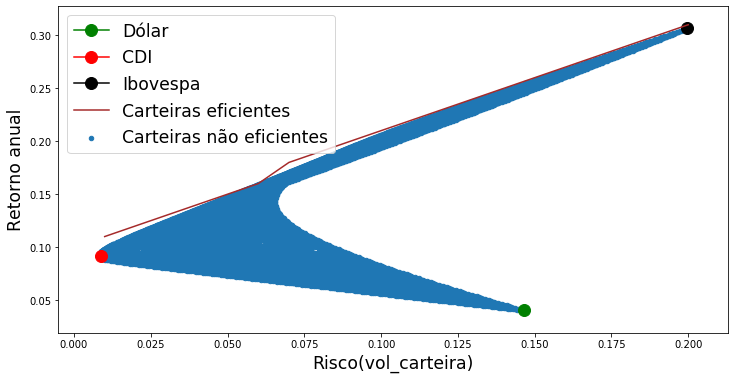

In [39]:
tcc.grafico_var(tabela_var,i ='vol_carteira')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe951f0f090>,
 Text(0.5, 0, 'Risco(vol_carteira)'),
 Text(0, 0.5, 'Retorno anual'),
 <matplotlib.legend.Legend at 0x7fe951cd7ad0>)

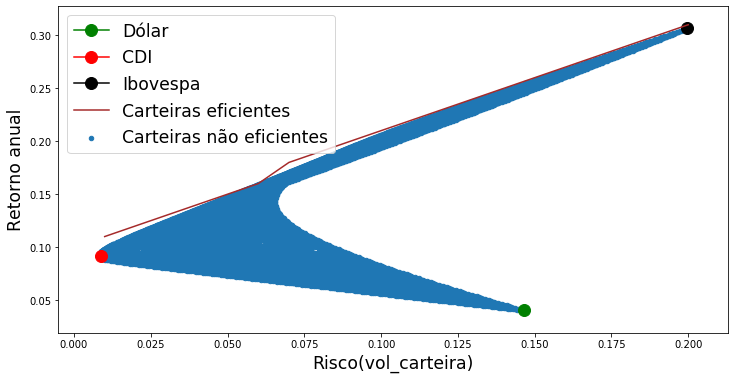

In [41]:
tcc.grafico_var(tabela_var)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe951ea8850>,
 Text(0.5, 0, 'Risco(var_cornish_fisher)'),
 Text(0, 0.5, 'Retorno anual'),
 <matplotlib.legend.Legend at 0x7fe950140290>)

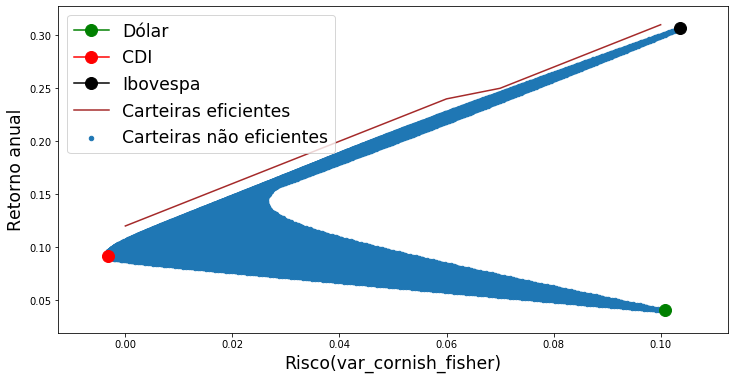

In [42]:
tcc.grafico_var(tabela_var,i ='var_cornish_fisher')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe9482afc90>,
 Text(0.5, 0, 'Risco(cvar)'),
 Text(0, 0.5, 'Retorno anual'),
 <matplotlib.legend.Legend at 0x7fe951dedb50>)

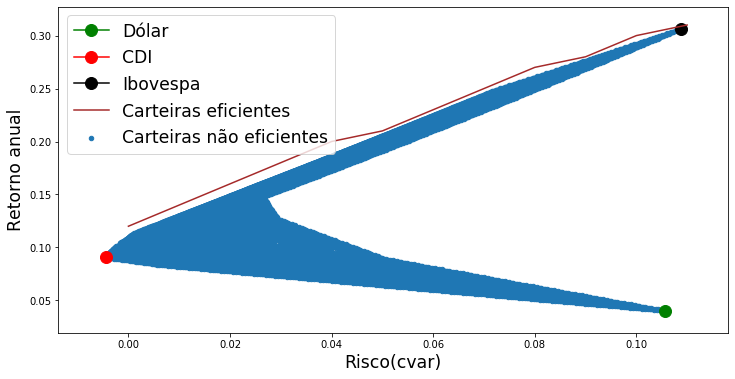

In [43]:
tcc.grafico_var(tabela_var,i ='cvar')

In [47]:
retorno_carteiras_eficientes = tcc.retorno_carteiras_eficientes(ativos,carteiras_eficientes) 
retorno_carteiras_eficientes.head()

,retorno_dolar_m,retorno_cdi_m,retorno_ibovespa_m,carteira 1,carteira 2,carteira 3,carteira 4,carteira 5,carteira 6,carteira 7,...,carteira 11,carteira 12,carteira 13,carteira 14,carteira 15,carteira 16,carteira 17,carteira 18,carteira 19,carteira 20
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.006779,0.009489,-0.041195,0.005019,0.001869,-0.001280,-0.004430,-0.007593,-0.010448,-0.016480,...,-0.025843,-0.027509,-0.029174,-0.030854,-0.032519,-0.034198,-0.035891,-0.037570,-0.039263,-0.040955
2016-02-29,-0.015635,0.010015,0.059102,0.012648,0.014567,0.016487,0.018406,0.020197,0.022255,0.025977,...,0.035186,0.037930,0.040674,0.043290,0.046034,0.048650,0.051137,0.053753,0.056240,0.058728
2016-03-31,-0.105730,0.011605,0.169701,0.018003,0.022796,0.027588,0.032380,0.036586,0.042348,0.051728,...,0.081563,0.091790,0.102016,0.111656,0.121883,0.131523,0.140577,0.150217,0.159270,0.168323
2016-04-30,-0.030380,0.010545,0.077015,0.013739,0.016090,0.018442,0.020793,0.022940,0.025572,0.030147,...,0.042649,0.046612,0.050576,0.054335,0.058298,0.062057,0.065611,0.069370,0.072924,0.076478
2016-05-31,0.041824,0.011075,-0.100890,0.003403,-0.002085,-0.007573,-0.013061,-0.018395,-0.023785,-0.034355,...,-0.055222,-0.060371,-0.065519,-0.070514,-0.075663,-0.080658,-0.085499,-0.090494,-0.095336,-0.100177


In [64]:
var_cfisher = pd.DataFrame(tcc.var_cornish_fisher(retorno_carteiras_eficientes),columns=['var_cornish_fisher'])
    
cvar_frontier = pd.DataFrame(tcc.cvar_historico(retorno_carteiras_eficientes),columns=['cvar'])

var_hist = pd.DataFrame(tcc.var_historico(retorno_carteiras_eficientes),columns=['var_histórico'])

var_gauss = pd.DataFrame(tcc.var_gaussiano(retorno_carteiras_eficientes),columns=['var_gaussiano'])

In [65]:
mean_return = pd.DataFrame(retorno_carteiras_eficientes.mean(),columns=['retorno_médio'])

In [71]:
tabela_var_tcc = var_gauss.join(var_cfisher).join(var_hist).join(cvar_frontier)#.join(mean_return)

In [80]:
tabela_var_tcc.columns

Index(['var_gaussiano', 'var_cornish_fisher', 'var_histórico', 'cvar'], dtype='object')

KeyError: "None of [Index(['carteira 1', 'carteira 2', 'carteira 3', 'carteira 4', 'carteira 5',\n       'carteira 6', 'carteira 7', 'carteira 8', 'carteira 9', 'carteira 10',\n       'carteira 11', 'carteira 12', 'carteira 13', 'carteira 14',\n       'carteira 15', 'carteira 16', 'carteira 17', 'carteira 18',\n       'carteira 19', 'carteira 20'],\n      dtype='object')] are in the [columns]"

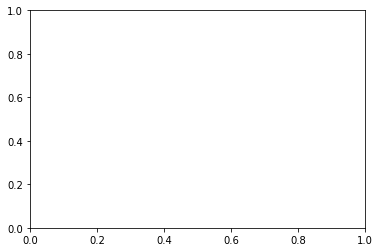

In [81]:
tabela_var_tcc.iloc[3:].plot.scatter(x = tabela_var_tcc.iloc[3:].index, y = ['var_gaussiano', 'var_cornish_fisher', 'var_histórico', 'cvar'])

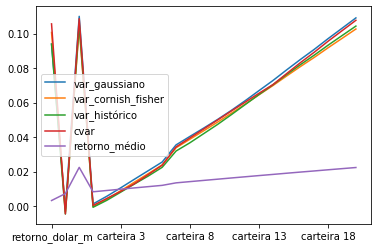

In [70]:
tabela_var_tcc.plot.scatter(x = tabela_var_tcc.index, y = [''])

In [63]:
tabela_var_tcc.to_excel('tabela_var.xlsx')

In [49]:
var_cf_dolar_cdi_ibovespa = var_cornish_fisher

In [50]:
var_cornish_fisher_carteiras = var_cornish_fisher

In [51]:
cvar_dolar_cdi_ibovespa = cvar
cvar_carteiras = cvar

In [52]:
var_cornish_fisher_carteiras.head()

,var_cornish_fisher
retorno_dolar_m,0.100750
retorno_cdi_m,-0.003298
retorno_ibovespa_m,0.103567
carteira 1,-0.000333
carteira 2,0.004095


In [53]:
cvar_carteiras.head()

,cvar
retorno_dolar_m,0.105730
retorno_cdi_m,-0.004441
retorno_ibovespa_m,0.108715
carteira 1,0.000405
carteira 2,0.004504


In [54]:
tabela_var = tabela
tabela_var.index = cvar_carteiras.index.tolist()
tabela_var.head()

ValueError: Length mismatch: Expected axis has 19483 elements, new values have 23 elements

In [ ]:
tabela_var = tabela_var.join(var_cornish_fisher_carteiras,
                             on=tabela_var.index).join(cvar_carteiras,
                             on=tabela_var.index)

# Fim